In [ ]:
"""!pip install "numpy == 1.26.4"
!pip install "pmdarima == 2.0.4"""


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Carga de paquetes

In [7]:
from pmdarima.arima import auto_arima
from pmdarima.utils import acf,pacf
from pmdarima.arima import ARIMA
import pandas as pd
import numpy as np
from statsmodels.sandbox.stats.runs import runstest_1samp # prueba de rachas de Wald y Wolfowitz
import statsmodels.api as sm # prueba de Box-Pierce y la modificación de Ljung-Box
from matplotlib import pyplot as plt # gráficos
import pylab as py
from scipy import stats
from datetime import datetime
from dateutil.relativedelta import relativedelta
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan

## Carga de datos y EDA

In [8]:
data = pd.read_excel("datosEmpleo.xlsx",index_col='mes',parse_dates=True)
data = data.reset_index()
data.head()

,mes,TD_13ciudades,Ocupados,Desocupados,Inactivos
0,2001-01-01,20.946380,6923.604,1834.507,4600.718
1,2001-02-01,19.894213,7037.746,1747.820,4596.805
2,2001-03-01,19.221565,6945.973,1652.823,4807.120
3,2001-04-01,17.888575,6973.079,1519.137,4937.280
4,2001-05-01,17.945654,6994.462,1529.720,4928.911


In [9]:
data.tail()

,mes,TD_13ciudades,Ocupados,Desocupados,Inactivos
217,2019-02-01,12.427409,10557.917,1498.272,6264.403
218,2019-03-01,11.975098,10760.776,1463.919,6116.140
219,2019-04-01,11.144286,10632.028,1333.469,6395.575
220,2019-05-01,11.500000,10813.000,1369.000,6199.000
221,2019-06-01,10.700000,10848.000,1306.000,6247.000


In [10]:
data.shape

(222, 5)

In [11]:
data.describe()

,mes,TD_13ciudades,Ocupados,Desocupados,Inactivos
count,222,222.000000,222.000000,222.000000,222.000000
mean,2010-03-17 06:22:42.162162176,12.601883,9160.852009,1290.681131,5500.277973
min,2001-01-01 00:00:00,8.140713,6923.604000,857.491000,4596.805000
25%,2005-08-08 18:00:00,10.396078,7971.103000,1152.874750,5308.814750
50%,2010-03-16 12:00:00,11.925036,9139.064500,1270.201000,5533.044500
75%,2014-10-24 06:00:00,14.087588,10458.510250,1398.899250,5752.608500
max,2019-06-01 00:00:00,20.946380,11037.199000,1834.507000,6395.575000
std,NaN,2.808235,1295.492800,181.948810,389.227213


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   mes            222 non-null    datetime64[ns]
 1   TD_13ciudades  222 non-null    float64       
 2   Ocupados       222 non-null    float64       
 3   Desocupados    222 non-null    float64       
 4   Inactivos      222 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 8.8 KB


<Axes: >

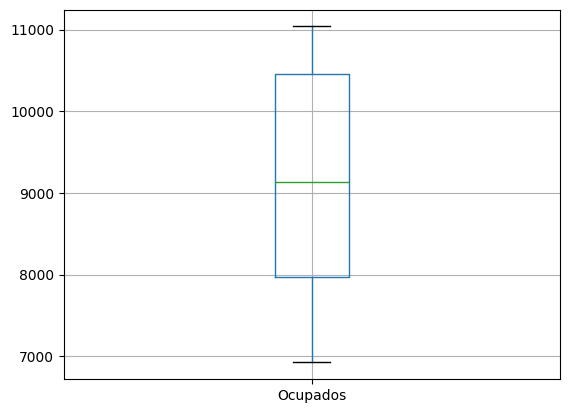

In [13]:
data.boxplot(column = "Ocupados") # Diagrama de caja de una columna.

<Axes: >

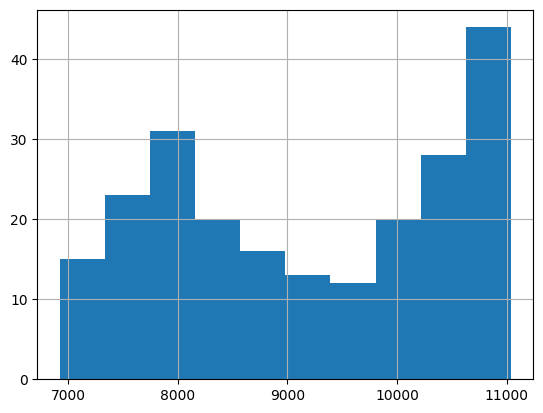

In [14]:
data["Ocupados"].hist() # Histograma de una columna.

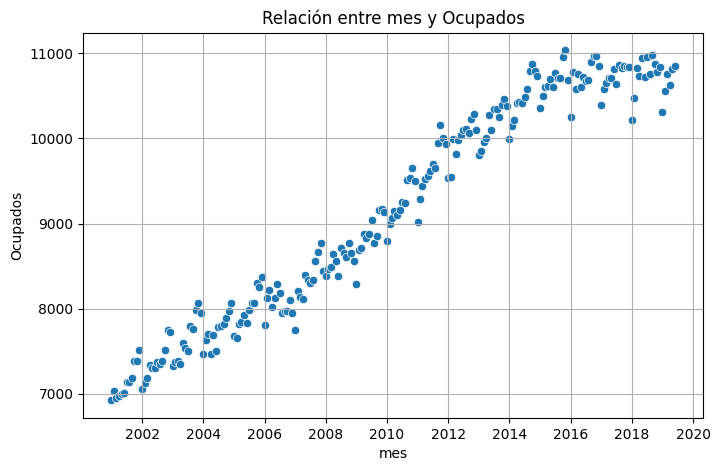

In [15]:
# Gráfico de dispersión para visualizar la relación
plt.figure(figsize=(8,5))

sns.scatterplot(x='mes', y='Ocupados', data=data)
plt.title('Relación entre mes y Ocupados')
plt.xlabel('mes')
plt.ylabel('Ocupados')
plt.grid(True)
plt.show()

## Separación de datos

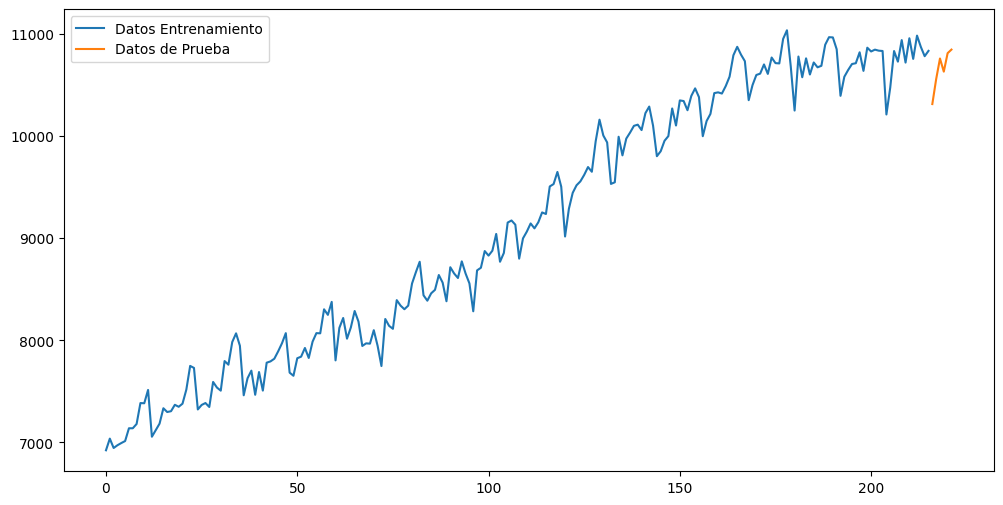

In [16]:
train_len = 216
train_to = data[["Ocupados"]][:train_len]
test_to = data[["Ocupados"]][train_len:]

fig = plt.figure(figsize=(12, 6))
plt.plot(train_to,label="Datos Entrenamiento")
plt.plot(test_to,label="Datos de Prueba")
plt.legend(loc= "upper left")
plt.show()

## ACF y PACF

In [17]:
acf(train_to,40)

array([1.        , 0.97842804, 0.96254063, 0.94808429, 0.93477526,
       0.92393405, 0.91046441, 0.90073659, 0.88761281, 0.87748064,
       0.86908695, 0.86549053, 0.86309578, 0.84411388, 0.82691131,
       0.81146819, 0.79951989, 0.78851595, 0.77597231, 0.76502544,
       0.75213945, 0.740503  , 0.73218145, 0.72674709, 0.72199376,
       0.70369971, 0.68410682, 0.66723623, 0.65249806, 0.64108316,
       0.62638433, 0.61429322, 0.60189809, 0.58947513, 0.5809789 ,
       0.57375215, 0.56801817, 0.54842667, 0.52869507, 0.51218875,
       0.49768442])

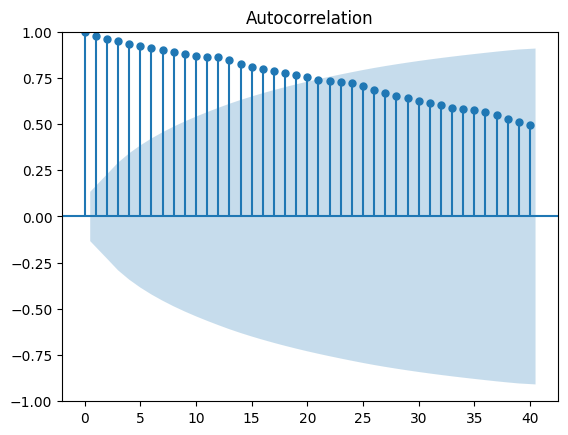

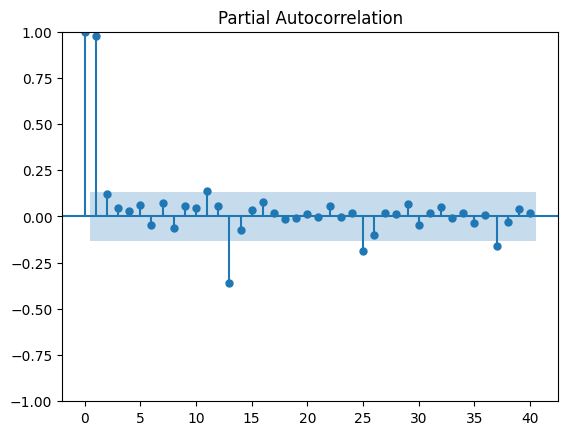

In [18]:
plot_acf(train_to,lags=40);
plot_pacf(train_to,lags=40);

In [19]:
## information_criterion (‘aic’, ‘aicc’, ‘bic’, ‘hqic’, ‘oob’)
model = auto_arima(train_to,max_p=10, max_q=10,information_criterion = ("aic"))
model.summary()

c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ALEXANDER\AppData\Local\Programs\Python\Python311\Lib\site-pack

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  216
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1408.709
Date:               sáb, 15 nov. 2025   AIC                           2825.418
Time:                        07:15:22   BIC                           2838.901
Sample:                             0   HQIC                          2830.866
                                - 216                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.2480      2.382      4.303      0.000       5.580      14.916
ar.L1          0.4446      0.096      4.642      0.000       0.257       0.632
ma.L1         -0.8707      0.049    -17.901      0.000      -0.966      -0.775
sigma2      2.853e+04   2438.811     11.699      0.000    2.38e+04    3.33e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                47.82
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                            -0.92
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.resid()

,0
0,6905.151379
1,157.648305
2,-40.566599
3,26.635836
4,20.317884
...,...
211,-183.469651
212,148.142550
213,-93.284376
214,-133.342206


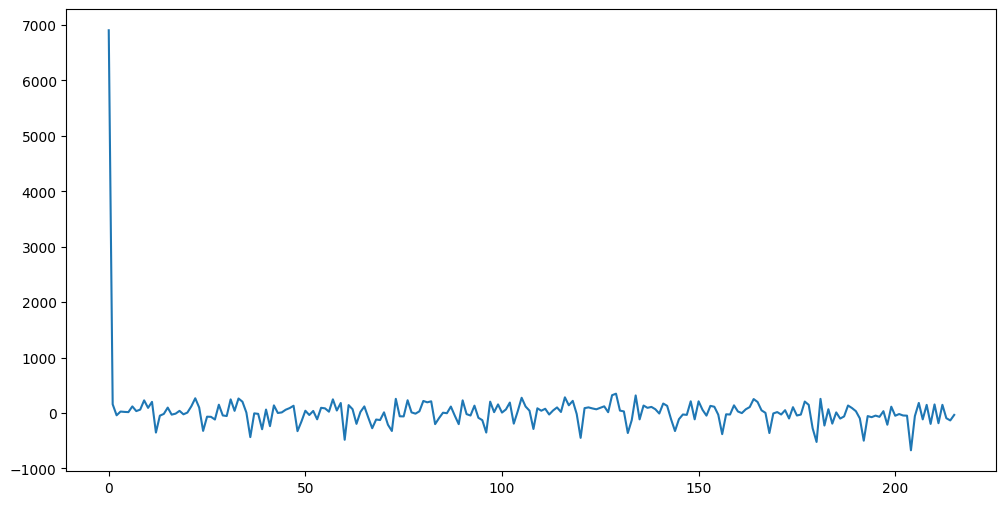

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(model.resid(),label="Residuales")

## Pronóstico del ARIMA(1,1,1) obtenido en el auto.arima

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


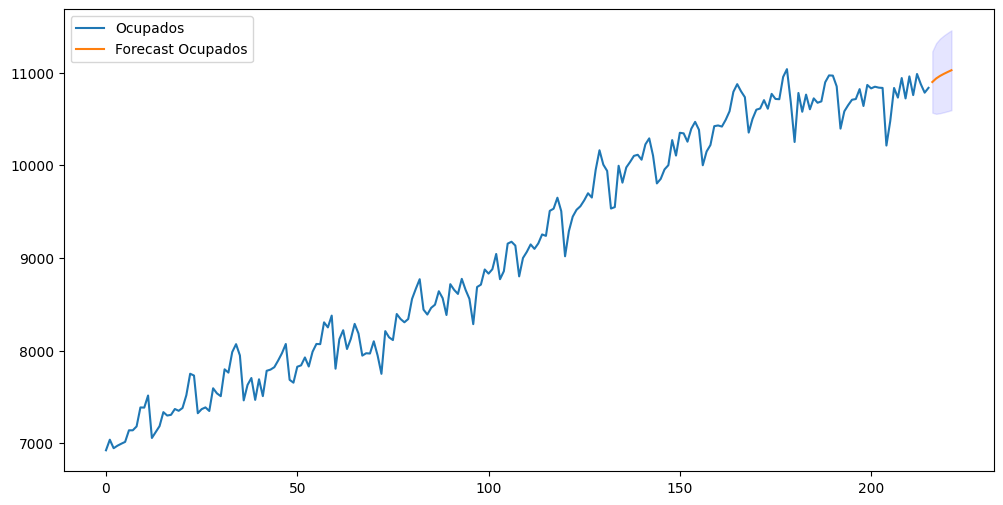

In [ ]:
h=6

y_forec, conf_int  = model.predict(h,return_conf_int=True,alpha=0.05)
preds = pd.DataFrame(np.column_stack([y_forec,conf_int[:,0] , conf_int[:,1]]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']

# x_for is no longer needed as we will use DatetimeIndex for forecast

fig = plt.figure(figsize=(12, 6))
plt.plot(train_to.index, train_to['Ocupados'], label="Ocupados") # Corrected to use train_to's index and column
plt.plot(y_forec.index, preds['Point_forecast'],label="Forecast Ocupados") # Use DatetimeIndex from y_forec for forecast
plt.fill_between(y_forec.index,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1) # Use DatetimeIndex from y_forec
plt.legend()
plt.show()

## Replicando el modelo sin hacer auto arima

In [ ]:
model = ARIMA(order=(1,1,1))
results = model.fit( train_to)
results.summary()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  216
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1408.709
Date:                Thu, 13 Nov 2025   AIC                           2825.418
Time:                        22:26:56   BIC                           2838.901
Sample:                             0   HQIC                          2830.866
                                - 216                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     10.2480      2.382      4.303      0.000       5.580      14.916
ar.L1          0.4446      0.096      4.642      0.000       0.257       0.632
ma.L1         -0.8707      0.049    -17.901      0.000      -0.966      -0.775
sigma2      2.853e+04   2438.811     11.699      0.000    2.38e+04    3.33e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                47.82
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                            -0.92
Prob(H) (two-sided):                  0.42   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Intervalos de confianza usando boostrap

In [ ]:
h= 6
res = results.resid()

my_samples = []
for _ in range(1000):

    x = np.random.choice(res, size=h, replace=True)
    my_samples.append(x)

q1=np.quantile(my_samples,0.025,axis=0)
q2=np.quantile(my_samples,0.975,axis=0)

fore = results.predict(h,return_conf_int=False)

preds = pd.DataFrame(np.column_stack([fore,fore+np.cumsum(q1) , fore+np.cumsum(q2)]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']

preds

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Point_forecast,lower_95,upper_95
0,10898.222667,10415.956753,11173.753291
1,10936.404581,10006.509648,11487.465828
2,10963.629505,9586.105551,11776.777317
3,10985.982584,9174.399829,12082.403010
4,11006.169479,8833.389931,12378.120529
5,11025.393216,8418.215610,12680.616880


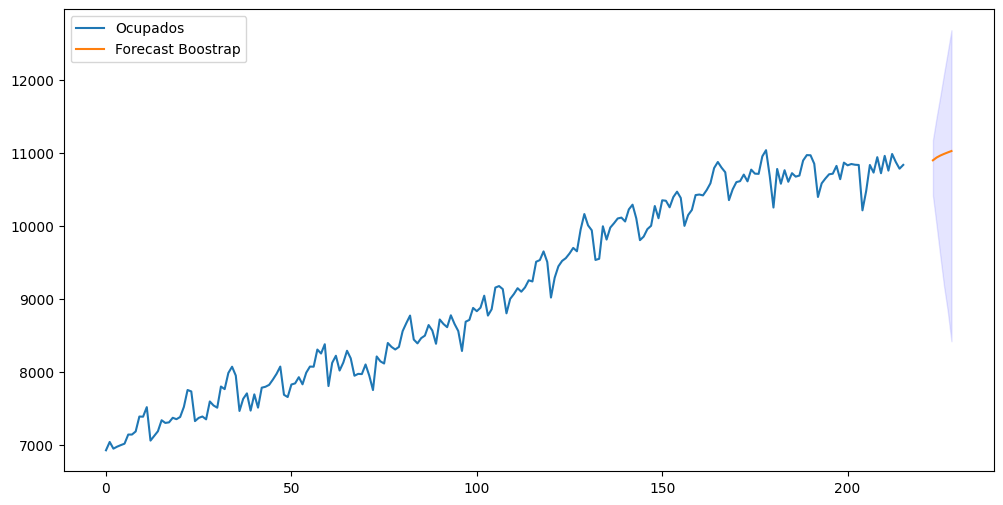

In [ ]:
x_for= np.linspace((data.shape[0]+1),(data.shape[0]+h),h)

fig = plt.figure(figsize=(12, 6))
plt.plot(train_to.index,train_to["Ocupados"],label="Ocupados")
plt.plot(x_for,preds['Point_forecast'],label="Forecast Boostrap")
plt.fill_between(x_for,preds['lower_95'], preds['upper_95'], color='blue', alpha=0.1)
plt.legend()
plt.show()

In [ ]:
print(preds)

   Point_forecast      lower_95      upper_95
0    10898.222667  10415.956753  11173.753291
1    10936.404581  10006.509648  11487.465828
2    10963.629505   9586.105551  11776.777317
3    10985.982584   9174.399829  12082.403010
4    11006.169479   8833.389931  12378.120529
5    11025.393216   8418.215610  12680.616880


In [ ]:
# Calcula el RMSE
rmse = np.sqrt(mean_squared_error(test_to["Ocupados"], preds["Point_forecast"]))
print(f"RMSE: {rmse:.2f}")

RMSE: 346.24


# Pronósticos usando todo el dataset

### ACF y PACF

In [ ]:
acf(data['Ocupados'],40)

array([1.        , 0.97855484, 0.96290943, 0.94999592, 0.93767278,
       0.92828634, 0.91803512, 0.90827078, 0.89628125, 0.88592368,
       0.8772359 , 0.8728291 , 0.86780346, 0.84936325, 0.83206921,
       0.81773834, 0.80588679, 0.79695724, 0.78708534, 0.77639894,
       0.76345987, 0.75177965, 0.74296472, 0.73663393, 0.73128083,
       0.71333785, 0.69520217, 0.68008434, 0.66685076, 0.65659735,
       0.64390143, 0.63170587, 0.6184013 , 0.60541159, 0.59596135,
       0.58936238, 0.5824738 , 0.56326155, 0.54546119, 0.53051481,
       0.51728811])

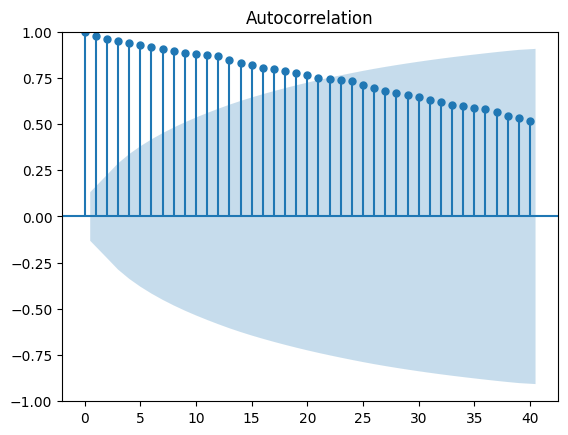

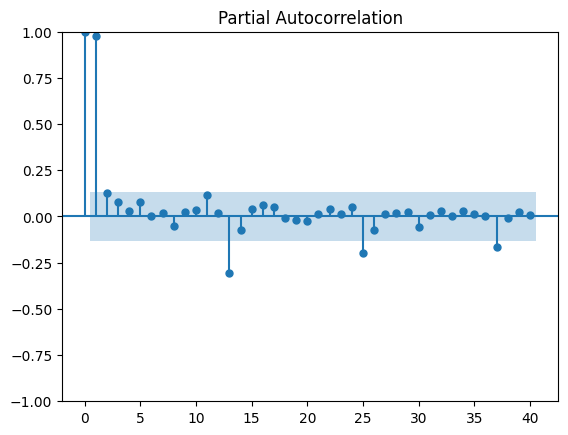

In [ ]:
plot_acf(data['Ocupados'],lags=40);
plot_pacf(data['Ocupados'],lags=40);

In [ ]:
## information_criterion (‘aic’, ‘aicc’, ‘bic’, ‘hqic’, ‘oob’)
model = auto_arima(data["Ocupados"],max_p=10, max_q=10,information_criterion = ("aic"))
model.summary()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  222
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1451.595
Date:                Thu, 13 Nov 2025   AIC                           2911.190
Time:                        22:41:22   BIC                           2924.782
Sample:                             0   HQIC                          2916.678
                                - 222                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.8551      2.485      3.965      0.000       4.984      14.726
ar.L1          0.4419      0.101      4.357      0.000       0.243       0.641
ma.L1         -0.8618      0.053    -16.414      0.000      -0.965      -0.759
sigma2      2.948e+04   2480.399     11.885      0.000    2.46e+04    3.43e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                57.86
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.99
Prob(H) (two-sided):                  0.28   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.resid()

,0
0,6905.945665
1,159.981703
2,-38.696293
3,28.345019
4,22.031181
...,...
217,-33.944119
218,56.155412
219,-179.849548
220,73.008210


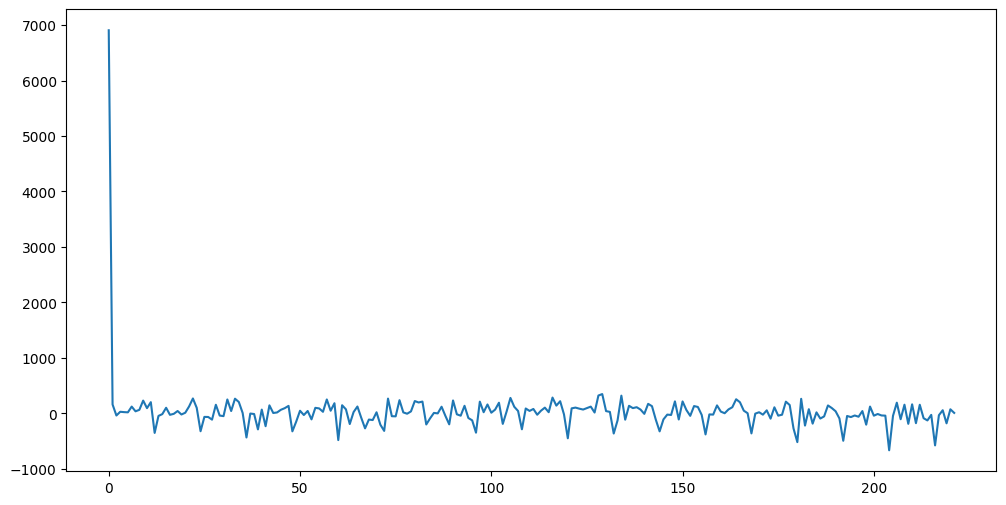

In [ ]:
fig = plt.figure(figsize=(12, 6))
plt.plot(model.resid(),label="Residuales")

## Pronóstico del ARIMA(0,1,1) obtenido en el auto.arima

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


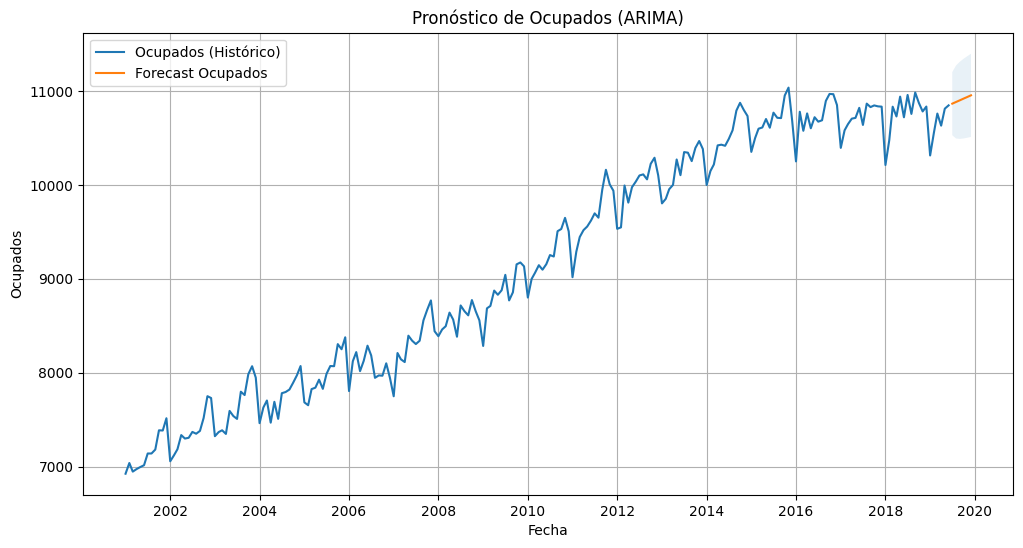

In [ ]:
# -------------------------
# 1. Convertir "mes" a datetime y ponerlo como índice
# -------------------------
data["mes"] = pd.to_datetime(data["mes"])
data = data.set_index("mes")

# -------------------------
# 2. Pronóstico ARIMA
# -------------------------
h = 6
y_forec, conf_int = model.predict(h, return_conf_int=True, alpha=0.05)

# Convertir forecast a DataFrame
preds = pd.DataFrame({
    "Point_forecast": y_forec,
    "lower_95": conf_int[:, 0],
    "upper_95": conf_int[:, 1]
})

# -------------------------
# 3. Crear fechas futuras reales (NO x_for numérico)
# -------------------------
future_dates = pd.date_range(
    start=data.index[-1] + relativedelta(months=1),
    periods=h,
    freq="MS"
)

# Asignar fechas al índice de predicciones
preds.index = future_dates

# -------------------------
# 4. Graficar
# -------------------------
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Ocupados"], label="Ocupados (Histórico)")
plt.plot(preds.index, preds["Point_forecast"], label="Forecast Ocupados")
plt.fill_between(preds.index, preds['lower_95'], preds['upper_95'], alpha=0.1)

plt.title("Pronóstico de Ocupados (ARIMA)")
plt.xlabel("Fecha")
plt.ylabel("Ocupados")
plt.grid(True)
plt.legend()
plt.show()

## Replicando el modelo sin hacer auto arima

In [ ]:
model = ARIMA(order=(1,1,1))
results = model.fit( data["Ocupados"])
results.summary()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  222
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1451.595
Date:                Thu, 13 Nov 2025   AIC                           2911.190
Time:                        22:46:26   BIC                           2924.782
Sample:                    01-01-2001   HQIC                          2916.678
                         - 06-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.8551      2.485      3.965      0.000       4.984      14.726
ar.L1          0.4419      0.101      4.357      0.000       0.243       0.641
ma.L1         -0.8618      0.053    -16.414      0.000      -0.965      -0.759
sigma2      2.948e+04   2480.399     11.885      0.000    2.46e+04    3.43e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                57.86
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.99
Prob(H) (two-sided):                  0.28   Kurtosis:                         4.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Intervalos de confianza usando boostrap

In [ ]:
h= 6
res = results.resid()

my_samples = []
for _ in range(1000):

    x = np.random.choice(res, size=h, replace=True)
    my_samples.append(x)

q1=np.quantile(my_samples,0.025,axis=0)
q2=np.quantile(my_samples,0.975,axis=0)

fore = results.predict(h,return_conf_int=False)

preds = pd.DataFrame(np.column_stack([fore,fore+np.cumsum(q1) , fore+np.cumsum(q2)]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']

preds

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Point_forecast,lower_95,upper_95
0,10866.345100,10417.008302,11144.362247
1,10884.306918,9952.995206,11440.341211
2,10902.099363,9535.953933,11736.150803
3,10919.816962,9104.334734,12022.421434
4,10937.501485,8671.866506,12318.123104
5,10955.171393,8207.561501,12604.103375


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


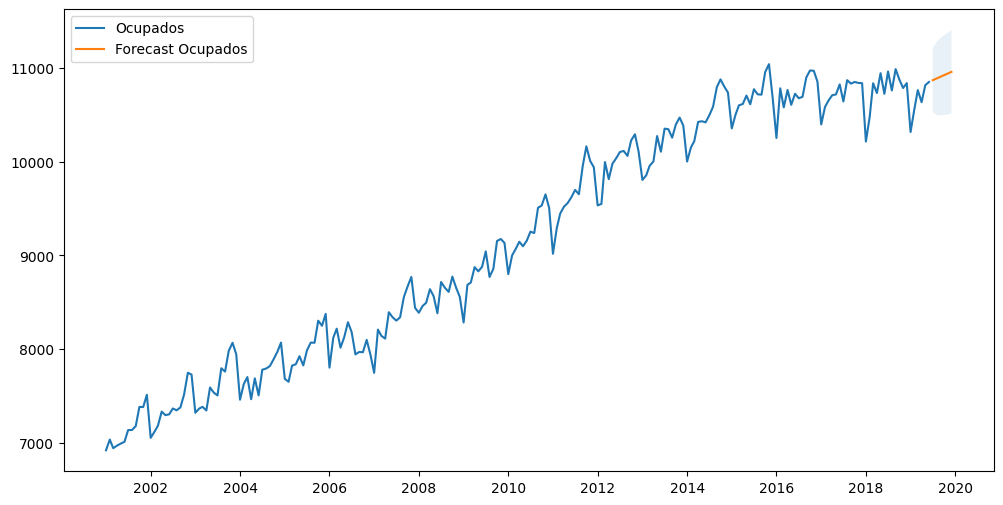

In [ ]:
# Horizonte
h = 6

# Pronóstico
y_forec, conf_int  = model.predict(h, return_conf_int=True, alpha=0.05)
preds = pd.DataFrame(np.column_stack([y_forec, conf_int[:,0], conf_int[:,1]]))
preds.columns = ['Point_forecast', 'lower_95', 'upper_95']

# Crear eje X para el forecast usando fechas (porque tu índice es de tipo fecha/mes)
x_for = pd.date_range(start=data.index[-1] + pd.offsets.MonthBegin(1),
                      periods=h, freq='MS')

# Gráfico
fig = plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Ocupados"], label="Ocupados")
plt.plot(x_for, preds['Point_forecast'], label="Forecast Ocupados")
plt.fill_between(x_for, preds['lower_95'], preds['upper_95'], alpha=0.1)
plt.legend()
plt.show()

In [ ]:
print(preds)

   Point_forecast      lower_95      upper_95
0    10866.345100  10529.822700  11202.867500
1    10884.306918  10495.268338  11273.345499
2    10902.099363  10491.034841  11313.163885
3    10919.816962  10495.515640  11344.118284
4    10937.501485  10503.136249  11371.866721
5    10955.171393  10512.066643  11398.276144


# Validación de supuestos

Primeros residuos:
mes
2001-01-01    6905.945665
2001-02-01     159.981703
2001-03-01     -38.696293
2001-04-01      28.345019
2001-05-01      22.031181
dtype: float64

=== Test de Ljung-Box (Autocorrelación) ===
     lb_stat  lb_pvalue
10  0.299196   0.999999

=== Test de Normalidad Jarque-Bera ===
Estadístico: 263262.2048
p-value: 0.0000

=== Test de Homocedasticidad Breusch-Pagan ===
LM Statistic: 2.9079
LM p-value: 0.0881
F-Statistic: 2.9199
F p-value: 0.0889


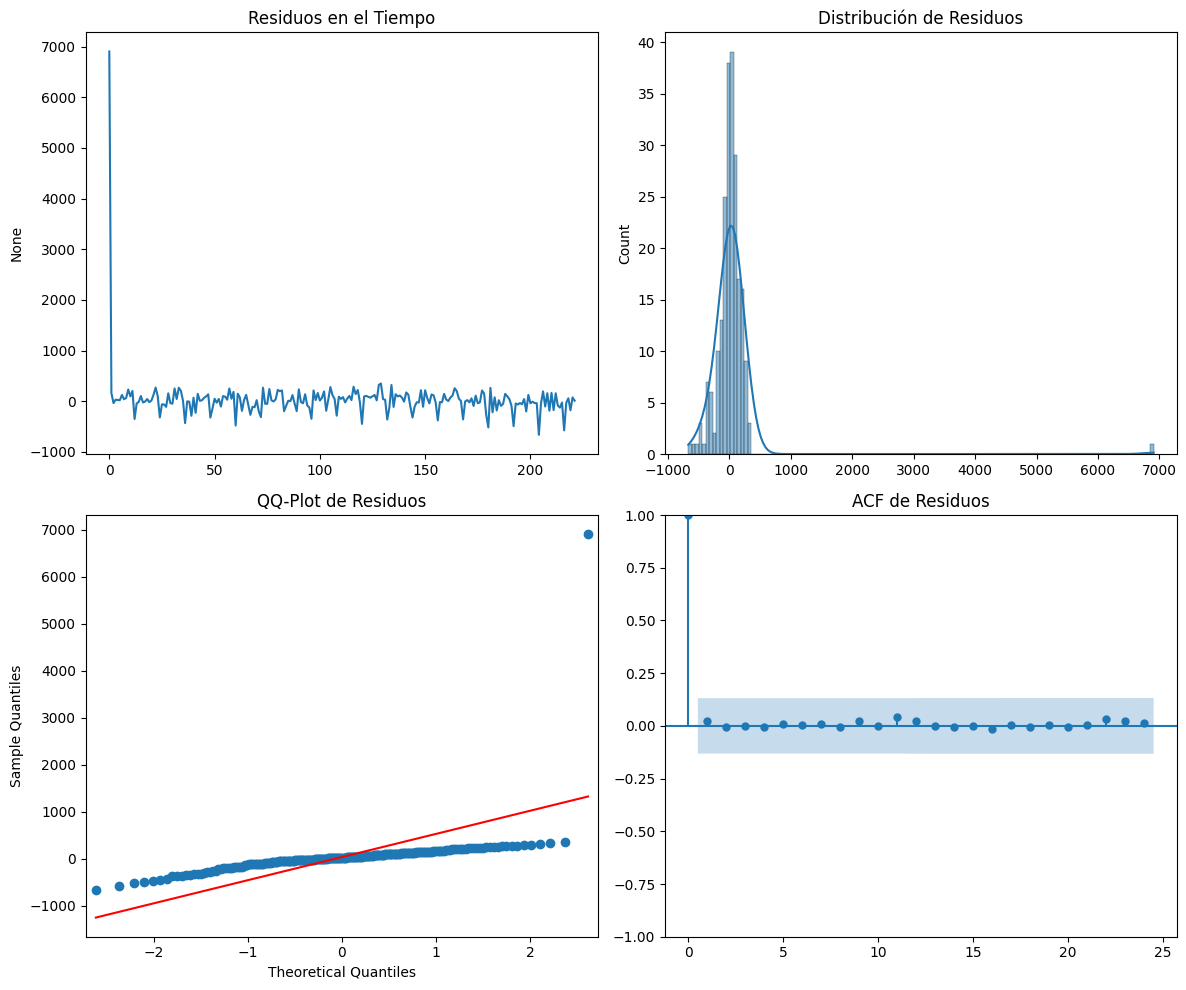

In [ ]:
# ===========================================
# 1. OBTENER RESIDUOS
# ===========================================
residuals = results.resid()

print("Primeros residuos:")
print(residuals.head())


# ===========================================
# 2. AUTOCORRELACIÓN — Test de Ljung-Box
# ===========================================
ljung = acorr_ljungbox(residuals, lags=[10], return_df=True)

print("\n=== Test de Ljung-Box (Autocorrelación) ===")
print(ljung)
# Interpretación:
# p-value > 0.05 → No hay autocorrelación → Cumple el supuesto


# ===========================================
# 3. NORMALIDAD — Test de Jarque-Bera
# ===========================================
jb_stat, jb_pvalue = stats.jarque_bera(residuals)

print("\n=== Test de Normalidad Jarque-Bera ===")
print(f"Estadístico: {jb_stat:.4f}")
print(f"p-value: {jb_pvalue:.4f}")
# p-value > 0.05 → No se rechaza normalidad → Cumple


# ===========================================
# 4. HOMOCEDASTICIDAD — Test Breusch-Pagan
# ===========================================
# Variables independientes (solo un vector de tendencia)
X = np.arange(len(residuals))
X = sm.add_constant(X)

bp_test = het_breuschpagan(residuals, X)
bp_labels = ['LM Statistic', 'LM p-value', 'F-Statistic', 'F p-value']

print("\n=== Test de Homocedasticidad Breusch-Pagan ===")
for name, value in zip(bp_labels, bp_test):
    print(f"{name}: {value:.4f}")
# p-value > 0.05 → No hay heterocedasticidad → Cumple


# ===========================================
# 5. GRÁFICOS DIAGNÓSTICO DE RESIDUOS
# ===========================================

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Residual plot
sns.lineplot(ax=axes[0,0], x=range(len(residuals)), y=residuals)
axes[0,0].set_title("Residuos en el Tiempo")

# Distribución de los residuos
sns.histplot(residuals, kde=True, ax=axes[0,1])
axes[0,1].set_title("Distribución de Residuos")

# QQ-Plot
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='s', ax=axes[1,0])
axes[1,0].set_title("QQ-Plot de Residuos")

# ACF de residuos
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals, ax=axes[1,1])
axes[1,1].set_title("ACF de Residuos")

plt.tight_layout()
plt.show()

1. Autocorrelación — Ljung-Box

* p-value = 0.999999 (> 0.05)
* ✔ No hay autocorrelación en los residuos.
* El modelo captura bien la estructura temporal.

2. Normalidad — Jarque-Bera

* p-value = 0.0000 (< 0.05)
* ✘ Los residuos NO son normales.
* Hay mucha asimetría o curtosis.

En series de tiempo esto es común y no invalida el modelo, pero afecta intervalos de confianza.

3. Homocedasticidad — Breusch-Pagan

* p-value ≈ 0.088 (> 0.05)
* ✔ Se asume homocedasticidad.
* La varianza de los residuos es constante.

Conclusión:

- Autocorrelación: ✔ Bien

- Normalidad: ❌ No se cumple

- Homocedasticidad: ✔ Bien